In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

60.95562590960199 93.59787425352857
-11.485997694174657 -91.43155129363005
-17.054182067305362 10.76286982493059
38.00064898481409 136.91999809431059
21.787750657179345 -155.35939551906043
-69.39641209670557 -46.83004171152726
-83.3832789223599 43.56923694160406
73.21417918614833 68.9435065053444
17.08129908023821 -179.83919518325254
-10.502259706640132 -65.69996474969504
5.953060076488256 -78.29724544607042
-32.50932615111804 -80.85538443214692
68.5648127111634 15.878239021019112
76.45855857035127 -33.371044479045366
62.86057144522687 -73.82546846722128
-53.76963607541332 150.62551896299942
-41.98326398948533 65.36350294525795
-50.77506715087209 167.7162962109141
45.07716572196523 -14.854569777003093
79.31940592014595 141.6484198334386
42.153646751964914 108.32769623952572
11.429152669701153 -131.9137008067829
-13.20485700329202 105.16358694524956
-78.55630764586022 -149.36144828585918
-66.04700536534841 23.274404113250966
44.020171481327594 80.15473769618296
50.79790057899166 106.930

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | severo-yeniseyskiy
Processing Record 2 of Set 12 | san cristobal
Processing Record 3 of Set 12 | namibe
Processing Record 4 of Set 12 | wajima
Processing Record 5 of Set 12 | kahului
Processing Record 6 of Set 12 | ushuaia
Processing Record 7 of Set 12 | port alfred
Processing Record 8 of Set 12 | yar-sale
Processing Record 9 of Set 12 | kapaa
Processing Record 10 of Set 12 | guayaramerin
Processing Record 11 of Set 12 | mutis
Processing Record 12 of Set 12 | talcahuano
Processing Record 13 of Set 12 | lodingen
Processing Record 14 of Set 12 | tasiilaq
Processing Record 15 of Set 12 | iqaluit
Processing Record 16 of Set 12 | hobart
Processing Record 17 of Set 12 | saint-philippe
Processing Record 18 of Set 12 | bluff
Processing Record 19 of Set 12 | muros
Processing Record 20 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 21 of Set 12 | dongsheng
Processing Record 22 of Se

Processing Record 34 of Set 15 | sabha
Processing Record 35 of Set 15 | singapore
Processing Record 36 of Set 15 | okhotsk
Processing Record 37 of Set 15 | souillac
Processing Record 38 of Set 15 | darhan
Processing Record 39 of Set 15 | puerto escondido
Processing Record 40 of Set 15 | barrow
Processing Record 41 of Set 15 | grindavik
Processing Record 42 of Set 15 | mancora
Processing Record 43 of Set 15 | langres
Processing Record 44 of Set 15 | semey
Processing Record 45 of Set 15 | taybad
Processing Record 46 of Set 15 | ponta delgada
Processing Record 47 of Set 15 | acapulco
Processing Record 48 of Set 15 | lorengau
Processing Record 49 of Set 15 | dalmatovo
Processing Record 50 of Set 15 | auburn
Processing Record 1 of Set 16 | hofn
Processing Record 2 of Set 16 | kaohsiung
Processing Record 3 of Set 16 | brae
Processing Record 4 of Set 16 | sechura
Processing Record 5 of Set 16 | lolua
City not found. Skipping...
Processing Record 6 of Set 16 | torbay
Processing Record 7 of Set

Processing Record 21 of Set 19 | hambantota
Processing Record 22 of Set 19 | melito di porto salvo
Processing Record 23 of Set 19 | ambodifototra
City not found. Skipping...
Processing Record 24 of Set 19 | san carlos de bariloche
Processing Record 25 of Set 19 | englewood
Processing Record 26 of Set 19 | shingu
Processing Record 27 of Set 19 | zolotinka
City not found. Skipping...
Processing Record 28 of Set 19 | vila velha
Processing Record 29 of Set 19 | padampur
Processing Record 30 of Set 19 | chinsali
Processing Record 31 of Set 19 | muscatine
Processing Record 32 of Set 19 | trussville
Processing Record 33 of Set 19 | bloemfontein
Processing Record 34 of Set 19 | sivaki
Processing Record 35 of Set 19 | bonavista
Processing Record 36 of Set 19 | nioaque
Processing Record 37 of Set 19 | sogdiondon
City not found. Skipping...
Processing Record 38 of Set 19 | mastic beach
Processing Record 39 of Set 19 | kushiro
Processing Record 40 of Set 19 | sentyabrskiy
City not found. Skipping.

Processing Record 5 of Set 23 | batagay
Processing Record 6 of Set 23 | coahuayana
Processing Record 7 of Set 23 | dabola
Processing Record 8 of Set 23 | jumla
Processing Record 9 of Set 23 | coihaique
Processing Record 10 of Set 23 | exeter
Processing Record 11 of Set 23 | am timan
Processing Record 12 of Set 23 | winnemucca
Processing Record 13 of Set 23 | port-cartier
Processing Record 14 of Set 23 | tucuman
Processing Record 15 of Set 23 | llanes
Processing Record 16 of Set 23 | mahajanga
Processing Record 17 of Set 23 | derby
Processing Record 18 of Set 23 | sedalia
Processing Record 19 of Set 23 | tebingtinggi
Processing Record 20 of Set 23 | uralets
Processing Record 21 of Set 23 | edd
Processing Record 22 of Set 23 | coolum beach
Processing Record 23 of Set 23 | linshu
City not found. Skipping...
Processing Record 24 of Set 23 | traiguen
Processing Record 25 of Set 23 | rio gallegos
Processing Record 26 of Set 23 | mercedes
Processing Record 27 of Set 23 | camacha
Processing Re

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Yeniseyskiy,60.3725,93.0408,41.79,85,97,8.39,RU,2022-05-21 16:22:41
1,San Cristobal,7.7669,-72.2250,73.58,40,15,10.16,VE,2022-05-21 16:22:41
2,Namibe,-15.1961,12.1522,77.63,47,0,13.80,AO,2022-05-21 16:22:41
3,Wajima,37.4000,136.9000,61.70,79,95,9.57,JP,2022-05-21 16:22:41
4,Kahului,20.8947,-156.4700,76.84,83,0,0.00,US,2022-05-21 16:20:59
5,Ushuaia,-54.8000,-68.3000,42.46,70,75,16.11,AR,2022-05-21 16:22:42
6,Port Alfred,-33.5906,26.8910,59.18,88,78,1.99,ZA,2022-05-21 16:22:42
7,Yar-Sale,66.8333,70.8333,32.29,79,68,15.88,RU,2022-05-21 16:22:42
8,Kapaa,22.0752,-159.3190,75.18,99,100,3.44,US,2022-05-21 16:22:42
9,Guayaramerin,-10.8368,-65.3614,84.25,48,0,5.75,BO,2022-05-21 16:22:43


In [13]:
#change the column order

new_column_order =[ "City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Yeniseyskiy,RU,2022-05-21 16:22:41,60.3725,93.0408,41.79,85,97,8.39
1,San Cristobal,VE,2022-05-21 16:22:41,7.7669,-72.2250,73.58,40,15,10.16
2,Namibe,AO,2022-05-21 16:22:41,-15.1961,12.1522,77.63,47,0,13.80
3,Wajima,JP,2022-05-21 16:22:41,37.4000,136.9000,61.70,79,95,9.57
4,Kahului,US,2022-05-21 16:20:59,20.8947,-156.4700,76.84,83,0,0.00
5,Ushuaia,AR,2022-05-21 16:22:42,-54.8000,-68.3000,42.46,70,75,16.11
6,Port Alfred,ZA,2022-05-21 16:22:42,-33.5906,26.8910,59.18,88,78,1.99
7,Yar-Sale,RU,2022-05-21 16:22:42,66.8333,70.8333,32.29,79,68,15.88
8,Kapaa,US,2022-05-21 16:22:42,22.0752,-159.3190,75.18,99,100,3.44
9,Guayaramerin,BO,2022-05-21 16:22:43,-10.8368,-65.3614,84.25,48,0,5.75


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


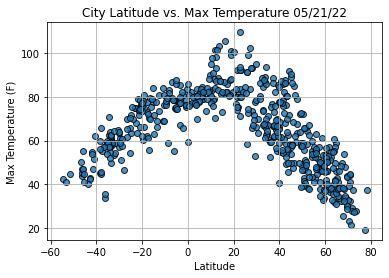

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

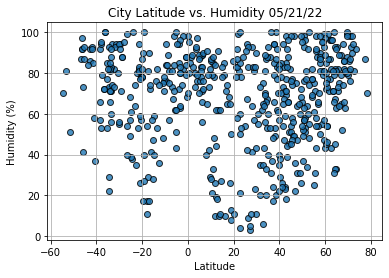

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


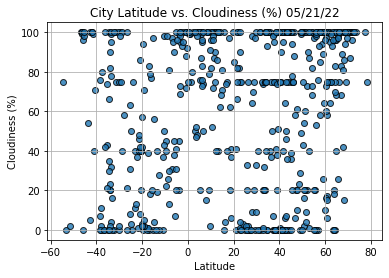

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

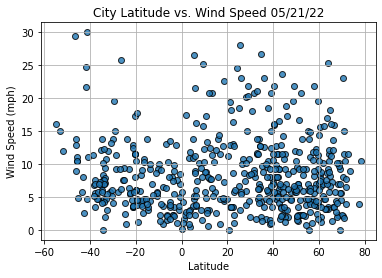

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                     Tasiilaq
Country                        GL
Date          2022-05-21 16:22:43
Lat                       65.6145
Lng                      -37.6368
Max Temp                    41.16
Humidity                       71
Cloudiness                     26
Wind Speed                   1.36
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Yeniseyskiy,RU,2022-05-21 16:22:41,60.3725,93.0408,41.79,85,97,8.39
1,San Cristobal,VE,2022-05-21 16:22:41,7.7669,-72.2250,73.58,40,15,10.16
3,Wajima,JP,2022-05-21 16:22:41,37.4000,136.9000,61.70,79,95,9.57
4,Kahului,US,2022-05-21 16:20:59,20.8947,-156.4700,76.84,83,0,0.00
7,Yar-Sale,RU,2022-05-21 16:22:42,66.8333,70.8333,32.29,79,68,15.88
...,...,...,...,...,...,...,...,...,...
538,Poronaysk,RU,2022-05-21 16:35:51,49.2167,143.1167,38.73,98,100,6.67
539,Dalian,CN,2022-05-21 16:35:52,38.9122,121.6022,66.61,77,38,6.71
540,San Quintin,MX,2022-05-21 16:35:52,30.4833,-115.9500,63.46,60,40,8.41
541,Pundaguitan,PH,2022-05-21 16:35:52,6.3711,126.1689,82.44,76,100,5.21


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Yeniseyskiy,RU,2022-05-21 16:22:41,60.3725,93.0408,41.79,85,97,8.39
1,San Cristobal,VE,2022-05-21 16:22:41,7.7669,-72.2250,73.58,40,15,10.16
3,Wajima,JP,2022-05-21 16:22:41,37.4000,136.9000,61.70,79,95,9.57
4,Kahului,US,2022-05-21 16:20:59,20.8947,-156.4700,76.84,83,0,0.00
7,Yar-Sale,RU,2022-05-21 16:22:42,66.8333,70.8333,32.29,79,68,15.88


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

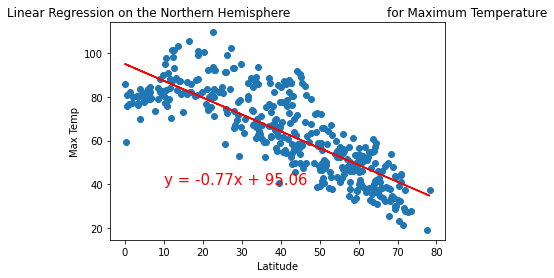

In [25]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

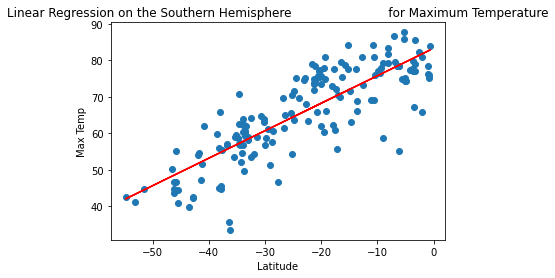

In [26]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

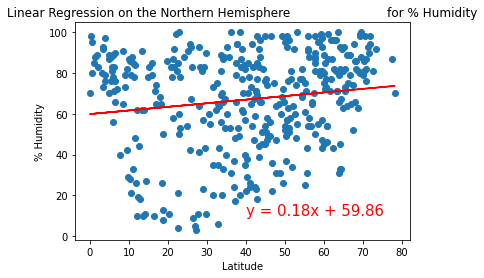

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

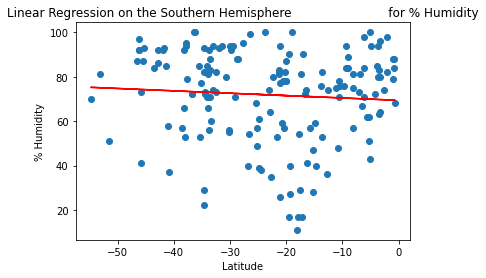

In [28]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

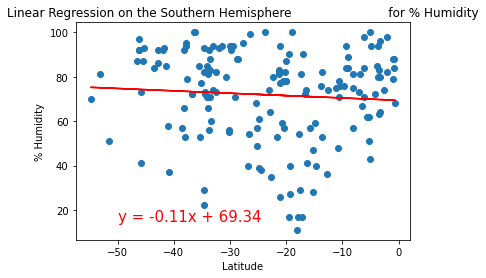

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))